## 붓꽃(iris) 데이터 분류

## #01. 패키지 참조

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 분류 결과 평가를 위한 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# 경고 메세지 출력 방지
import warnings
warnings.filterwarnings('ignore')

## #02. 데이터 가져오기

### 학습데이터 가져오기

In [2]:
origin = pd.read_excel('https://data.hossam.kr/G02/iris.xlsx')
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 데이터 전처리

#### 종속변수의 종류 확인

In [3]:
origin['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### 종속변수 라벨링

라벨정의

In [4]:
labels = {'setosa':0, 'versicolor':1,'virginica':2}
labels

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

결과 출력을 위한 라벨 역 정의

In [5]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}
classes

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

라벨링

In [6]:
df = origin.copy()
df['Species'] = df['Species'].map(labels)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 독립변수(feature), 종속변수(label) 분리

In [7]:
x = df.drop('Species', axis=1)
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### 시각화를 통한 데이터 확인
#### case1 : feature 2개만 사용

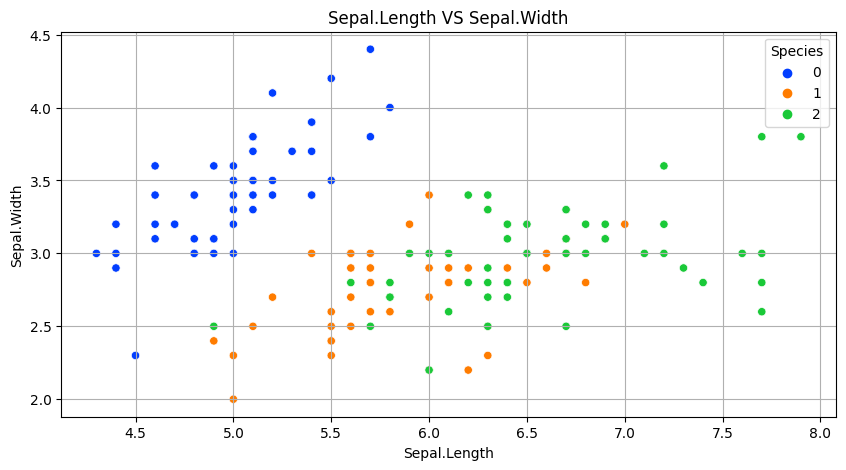

In [9]:
plt.figure(figsize=(10,5))

sb.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species', palette='bright')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Sepal.Length VS Sepal.Width')
plt.grid()
plt.show()
plt.close()

#### case2 : 산점도 행렬

<Figure size 1500x1000 with 0 Axes>

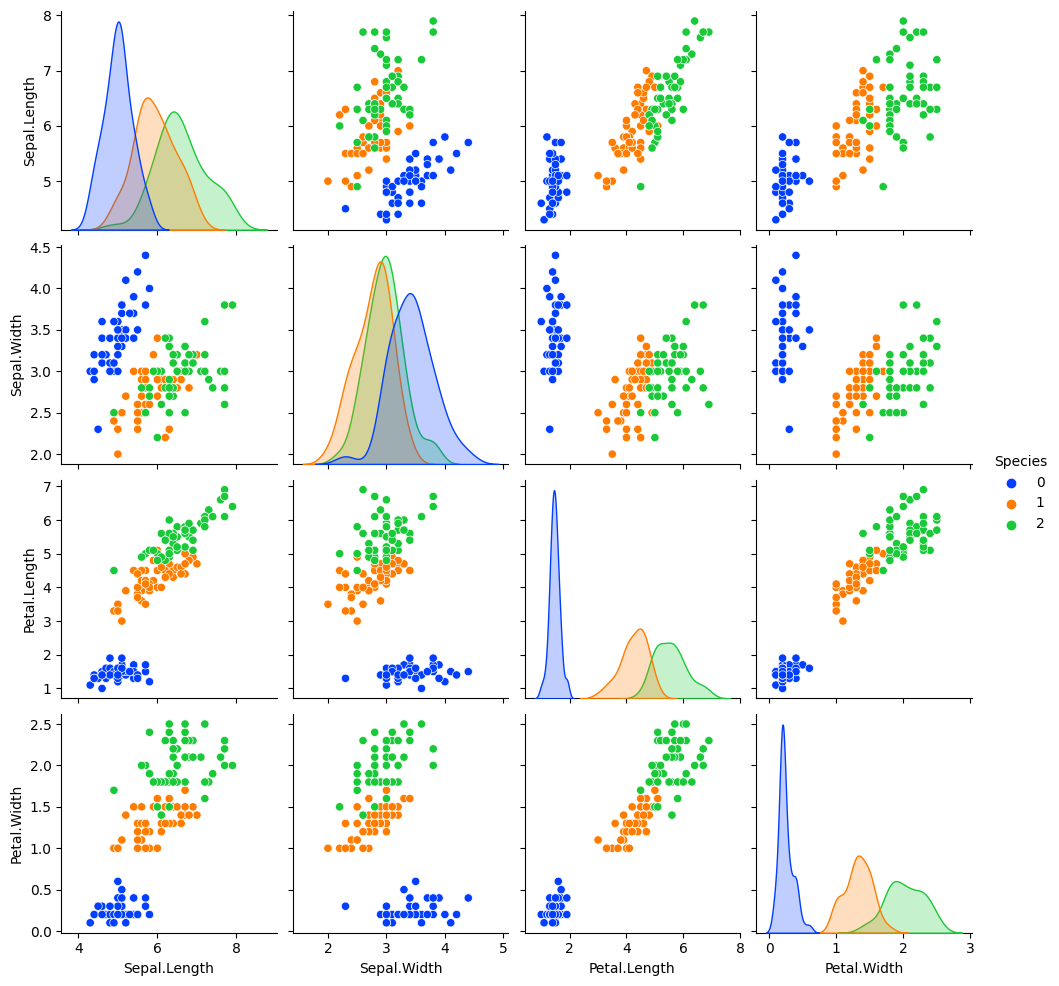

In [10]:
plt.figure(figsize=(15,10))
sb.pairplot(data=df, hue='Species', palette='bright')
plt.show()
plt.close()

## #03. K-NN 분류모델 구성

In [11]:
# 이웃의 수
k = 3

# 모델 정의(내가 사용하고자 하는 알고리즘을 선택)
knn = KNeighborsClassifier(n_neighbors=k)

# 학습
knn.fit(x,y)

#예측치 생성
y_pred = knn.predict(x)

#측정값과 예측치를 데이터프레임으로 생성
y_pred_df = pd.DataFrame({'y': y.values, 'y_pred':y_pred})
y_pred_df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


## #04. 분류 결과 확인

### 새로운 데이터 투입

#### 새로운 분류 대상 정의

In [12]:
new_data = [[5.2, 3.5, 1.5, 0.2]]

#### 새로운 분류 대상에 대한 예측

In [13]:
new_data_pred = knn.predict(new_data)
print("데이터:{0}, 예측{1}".format(new_data_pred[0], classes[new_data_pred[0]]))

데이터:0, 예측setosa


#### 근접한 이웃의 거리와 인덱스

In [14]:
dist, index = knn.kneighbors(new_data)
print("거리:{0}, 인덱스:{1}".format(dist, index))

거리:[[0.         0.14142136 0.14142136]], 인덱스:[[27 28  0]]


#### 근접한 이웃에 대한 실 데이터
근접한 이웃 데이터를 numpy array로 추출

In [15]:
df.values[index]

array([[[5.2, 3.5, 1.5, 0.2, 0. ],
        [5.2, 3.4, 1.4, 0.2, 0. ],
        [5.1, 3.5, 1.4, 0.2, 0. ]]])

근접한 이웃 데이터를 dataframe으로 추출

In [16]:
neighbors_data = df.iloc[index[0]]
neighbors_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0


### 분류 결과 시각화

In [17]:
# 팔레트 색상 확인(deep, muted, pastel, bright, dark, colorblind)
sb.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

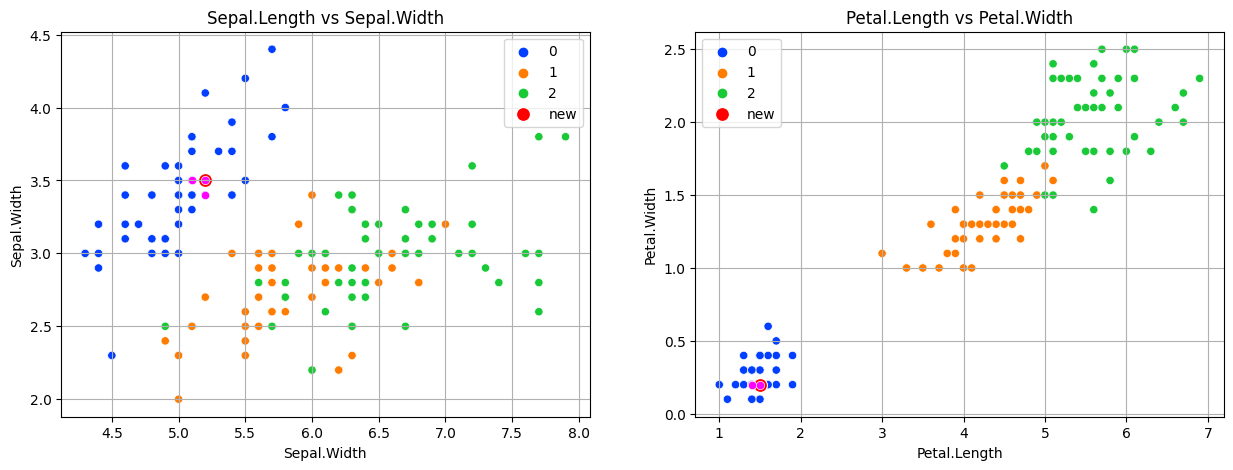

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Sepal.Length vs Sepal.width
sb.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species', palette='bright', ax=ax1)
ax1.set_xlabel('Sepal.Length')
ax1.set_xlabel('Sepal.Width')
ax1.set_title('Sepal.Length vs Sepal.Width')
ax1.grid()

#새로운 데이터 투입
sb.scatterplot(x=[new_data[0][0]], y=[new_data[0][1]], markers="^", s=100, c='r', label='new', ax=ax1)

# 근접 이웃 표시
sb.scatterplot(data=neighbors_data, x='Sepal.Length', y='Sepal.Width', c='#ff00ff', ax=ax1)

# Petal.Length vs Petal.Width
sb.scatterplot(data=df, x='Petal.Length', y='Petal.Width', hue='Species', palette='bright', ax=ax2)
ax2.set_xlabel('Petal.Length')
ax2.set_ylabel('Petal.Width')
ax2.set_title('Petal.Length vs Petal.Width')
ax2.grid()

sb.scatterplot(x=[new_data[0][2]], y=[new_data[0][3]], markers="^", s=100, c='r', label='new', ax=ax2)

# 근접 이웃 표시
sb.scatterplot(data=neighbors_data, x='Petal.Length', y='Petal.Width', c='#ff00ff', ax=ax2)

plt.show()
plt.close()

## #05. 분류 성능 평가

사이킷런 패키지는 metrics모듈에 다양한 성능 평가 방법을 제공한다.

이 때 주의할 점은 이진 분류 여부를 잘 확인하여 각각의 평가 지표를 적절하게 적용해야 한다.

- 오차행렬(혼동행렬) : `confusion_matrix(관측치, 예측치)`
- 정확도 : `accuracy_score(관측치, 예측치)`
- 정밀도 : `precision_score(관측치, 예측치)`
- 재현율 : `recall_score(관측치, 예측치)`
- F1스코어 : `f1_score(관측치, 예측치)`
- ROC 곡선 : `roc_curve(관측치, 예측치)`
- 분류 리포트 : `classification_report(관측치, 예측치)`
- AUC : `roc_auc_score(관측치, 예측치)`

불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 정확도만 가지고 판단할 경우 신뢰도가 떨어질 수 있다. 이런 경우 `정밀도 혹은 재현율` 을 사용하는 것이 더욱 바람직하다.
- 정밀도 : 실제 음성인 데이터를 양성으로 판단하는 것이 더 큰 문제인 경우에 사용한다. (ex.스팸 메일 분류 모델)
- 재현율 : 실제 양성인 데이터를 음성으로 판단하는 것이 더 큰 문제인 경우에 사용한다. (ex.암 판단 모델)

### 혼동행렬(오차행렬)

In [20]:
conf_mat = confusion_matrix(y_pred_df['y'], y_pred_df['y_pred'])
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

### 혼동행렬 시각화
`conf_mat`을 활용하여 직접 히트맵을 구현하기도 하지만 여기서는 sklearn의 `ConfusionMatrixDisplay`클래스를 활용해본다.

In [21]:
cls_labels = list(classes.values())
cls_labels


['setosa', 'versicolor', 'virginica']

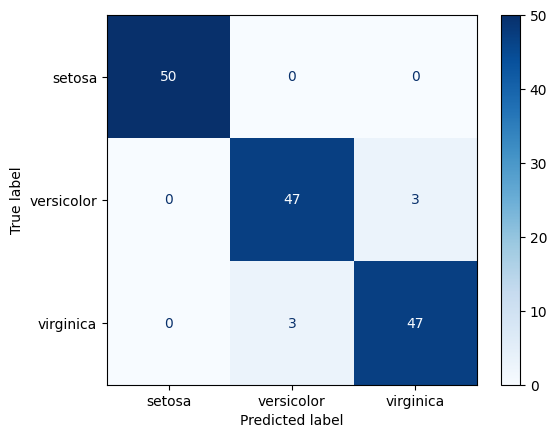

In [22]:
plot = ConfusionMatrixDisplay.from_predictions(
    y_pred_df['y'],             #정답
    y_pred_df['y_pred'],        #예측치
    display_labels=cls_labels,  #라벨
    cmap=plt.cm.Blues           #칼라맵 이름
)

plt.show()
plt.close()

### 정확도 판별

In [23]:
scores = accuracy_score(y_pred_df['y'], y_pred_df['y_pred'])
print("n_neigbors:{0}, 정확도:{1:.2f}".format(k, scores))

n_neigbors:3, 정확도:0.96


### 정밀도, 재현율, f값

이 값들은 이진분류에서만 사용할 수 있다. 그러므로 여기서는 실행시 에러가 발생한다.

이진분류가 아닌 경우 다중분류에서는 `macro`, `micro`, `weighted` 방식을 사용할 수 있다.

In [26]:
scores = precision_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print("n_neigbors:{0}, 정밀도:{1:.2f}".format(k, scores))

scores = recall_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print("n_neigbors:{0}, 재현율:{1:.2f}".format(k, scores))

scores = f1_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print("n_neigbors:{0}, f값:{1:.2f}".format(k, scores))

n_neigbors:3, 정밀도:0.96
n_neigbors:3, 재현율:0.96
n_neigbors:3, f값:0.96
